In [274]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import set_config
set_config(display="diagram")

In [275]:
data = pd.read_csv("eco.csv", sep=';')
data.head()

,Mois,Qualité,Territoire,Production totale,Consommation totale,Solde exportateur
0,0000-00,Données consolidées,Grand-Est,7296,3364,3876.0
1,0000-00,Données définitives,Nouvelle-Aquitaine,4523,3222,1300.0
2,0000-00,Données définitives,Auvergne-Rhône-Alpes,8890,5010,3658.0
3,0000-00,Données définitives,Bourgogne-Franche-Comté,152,1533,-1383.0
4,0000-00,Données définitives,Bretagne,197,1493,-1300.0


In [276]:
data.isnull().sum()


Mois                    0
Qualité                 0
Territoire              0
Production totale       0
Consommation totale     0
Solde exportateur      84
dtype: int64

<AxesSubplot:>

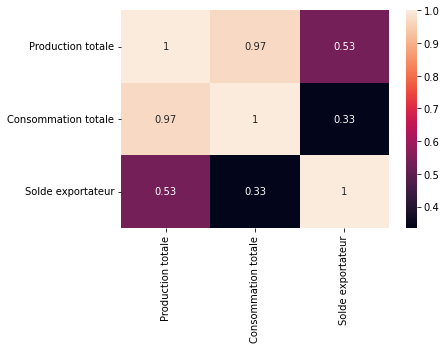

In [277]:
sns.heatmap(data.corr(),annot=True)

In [278]:
data.drop(data[data['Consommation totale']== 0].index, inplace = True)
data=data[data.Mois!="0000-00"]
data=data[data.Territoire!="France"]
data['Mois'] = data['Mois'].str[5:]
del data['Solde exportateur']
data

,Mois,Qualité,Territoire,Production totale,Consommation totale
205,01,Données consolidées,Grand-Est,10126,4594
206,01,Données définitives,Nouvelle-Aquitaine,4688,4501
207,01,Données définitives,Auvergne-Rhône-Alpes,13001,6693
208,01,Données définitives,Bourgogne-Franche-Comté,301,2158
209,01,Données définitives,Bretagne,345,2390
...,...,...,...,...,...
1136,12,Données définitives,Occitanie,2550,2988
1137,12,Données définitives,Normandie,4796,1907
1138,12,Données définitives,Hauts-de-France,3760,3617
1139,12,Données définitives,PACA,1563,3331


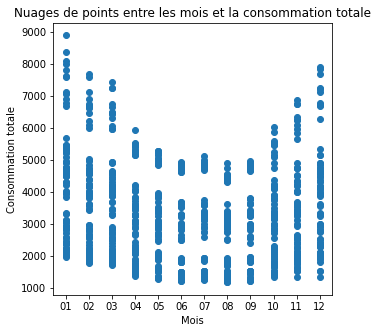

In [279]:
plt.figure(figsize=(5, 5))

plt.scatter(data['Mois'], data['Consommation totale']);
plt.xlabel('Mois')
plt.ylabel('Consommation totale')
plt.title('Nuages de points entre les mois et la consommation totale')
plt.show()

In [280]:
data.tail()

,Mois,Qualité,Territoire,Production totale,Consommation totale
1136,12,Données définitives,Occitanie,2550,2988
1137,12,Données définitives,Normandie,4796,1907
1138,12,Données définitives,Hauts-de-France,3760,3617
1139,12,Données définitives,PACA,1563,3331
1140,12,Données définitives,Pays-de-la-Loire,488,1931


In [281]:
data.shape

(864, 5)

In [282]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 205 to 1140
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Mois                 864 non-null    object
 1   Qualité              864 non-null    object
 2   Territoire           864 non-null    object
 3   Production totale    864 non-null    int64 
 4   Consommation totale  864 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 40.5+ KB


In [283]:
data.describe()

,Production totale,Consommation totale
count,864.000000,864.000000
mean,3719.217593,3271.263889
std,3305.426553,1506.315618
min,92.000000,1170.000000
25%,449.000000,1970.750000
50%,3246.000000,3009.000000
75%,5878.250000,4225.250000
max,13001.000000,8894.000000


In [284]:
y = data['Consommation totale']
X = data[['Mois', 'Territoire']]

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [286]:
X_test = np.array(X_test)
X_train = np.array(X_train)

In [287]:
onehot = OneHotEncoder()
X_train_onehot = onehot.fit_transform(X_train) # mise à l'échelle des features (données présentes en X dans le dataset d'étude)
X_train_onehot

<604x24 sparse matrix of type '<class 'numpy.float64'>'
	with 1208 stored elements in Compressed Sparse Row format>

In [288]:
X_test_onehot = onehot.transform(X_test)

In [289]:
model = LinearRegression()
# On établie que l'on va utiliser l'équation de type logistic regression car on cherche a obtenir une prediction sur une donnée catégorielle.
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

model.fit(X_train_onehot, y_train) # On établie l’entraînement du model soit la détermination des coefficients (a, b, etc) et autres.
# Attention, on doit scaler le X_test afin d'avoir la même échelle que la X_train pour pouvoir faire un scoring.

LinearRegression()

In [290]:
# Ici on scale le X_test pour mettre à l'échelle les données afin de faire le scoring
model.score(X_test_onehot, y_test) 

0.9481387375135321

In [297]:
y_predict = model.predict(X_test_onehot[0])
# On test notre model avec une prédiction basé sur les X_test_onehot (toujours des données mise à l'échelle).
y_predict

array([2117.74744362])

In [295]:
user = pd.DataFrame({'Mois': ['03'], 'Territoire':['PACA']})
user

,Mois,Territoire
0,03,PACA


In [296]:
user_scaled = onehot.transform(user)
user_scaled

/Users/quentingoubert/.pyenv/versions/simplon/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(


<1x24 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>

In [298]:
model.predict(user_scaled) # Nous indique la catégorie identifiée par le model.

array([3932.65316943])